<a href="https://colab.research.google.com/github/Sunday-Okey/Computer_Vision_Project/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Project Workflow

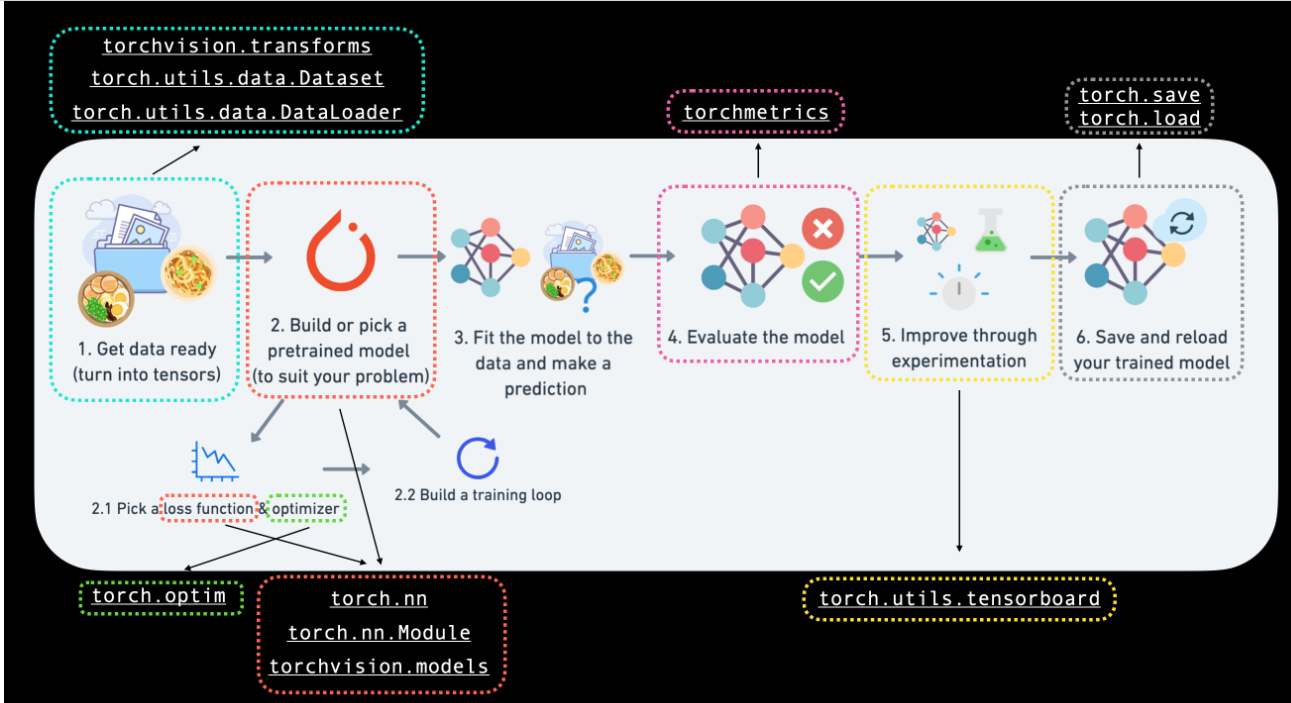

## Import necessary library


In [64]:
# Import PyTorch
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import visualization functions.
import matplotlib.pyplot as plt
import seaborn as ss

#Import sklearn functions for performace metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Import numpy
import numpy as np
# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


## 1. Getting a dataset

We're going to use FashionMNIST to demonstrate the application of CNN.

FashionMNIST contains grayscale images of 10 different kinds of clothing.


torchvision.datasets contains a lot of example datasets. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.

In [40]:
def load_fashion_mnist(is_train: bool):
    """Load FashionMNIST dataset.

    Args:
    is_train (bool): Flag indicating whether to load training or test set.

    Returns:
    Dataset: The requested dataset.
    """
    return datasets.FashionMNIST(
        root="data",
        train=is_train,
        download=True,
        transform=ToTensor()
    )

# Now load the datasets using the function
train_dataset = load_fashion_mnist(is_train=True)
test_dataset = load_fashion_mnist(is_train=False)

In [4]:
# let see first training sample
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

In [6]:
# How many samples do we have?

len(train_dataset.data), len(train_dataset.targets), len(test_dataset.data), len(test_dataset.targets)

(60000, 60000, 10000, 10000)

So we have 60000 training samples and 10000 testing examples.

Let's check their classes.

In [56]:
# Check classes
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
len(class_names)

10

## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


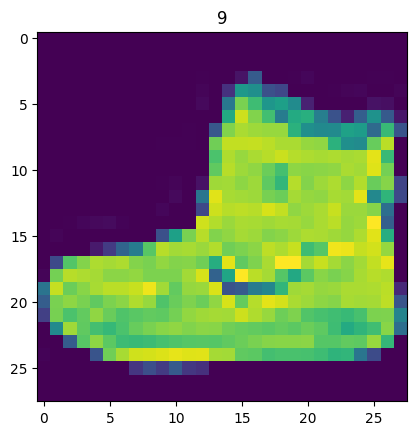

In [16]:
import matplotlib.pyplot as plt
image, label = train_dataset[0]
print(f"Image shape: {image.shape}")
plt.imshow(np.transpose(image,(1,2,0)))
plt.title(label);

## Convert the image to grayscale

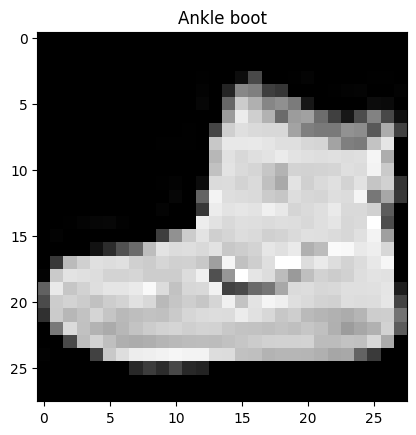

In [29]:
plt.imshow(image.squeeze(0), cmap="gray")
plt.title(class_names[label]);

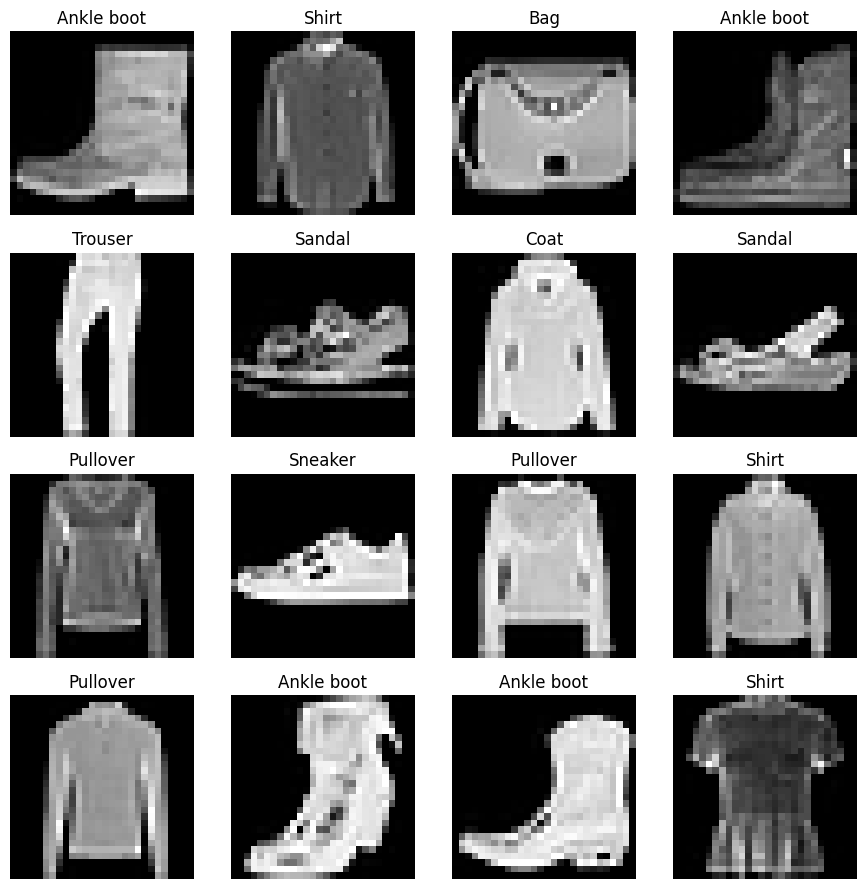

In [30]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 9))

# Flatten the axes array for convenient iteration
axes_flat = axes.flatten()

# Plot images in a 4x4 grid
for ax in axes_flat:
    random_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[random_idx]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(class_names[label])
    ax.axis('off')  # This turns off the axis lines and labels

# Adjust the layout so titles and images don't overlap
plt.tight_layout()
plt.show()

## 2. Prepare DataLoader

In [41]:
from torch.utils.data import DataLoader

# Define the batch size for the data loading
batch_size = 32

# Create DataLoader instances for training and testing datasets
train_loader = DataLoader(dataset=train_dataset,  # The dataset to wrap
                          batch_size=batch_size,  # Number of samples per batch
                          shuffle=True)  # Shuffle the data at every epoch

test_loader = DataLoader(dataset=test_dataset,  # The dataset to wrap
                         batch_size=batch_size,  # Number of samples per batch
                         shuffle=False)  # No need to shuffle the test data

# Output the details of the DataLoader instances created
print("DataLoaders:", (train_loader, test_loader))
print(f"Number of batches in train_loader: {len(train_loader)} (Each batch has {batch_size} samples)")
print(f"Number of batches in test_loader: {len(test_loader)} (Each batch has {batch_size} samples)")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c4360072d70>, <torch.utils.data.dataloader.DataLoader object at 0x7c43600737c0>)
Number of batches in train_loader: 1875 (Each batch has 32 samples)
Number of batches in test_loader: 313 (Each batch has 32 samples)


In [32]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

And we can see that the data remains unchanged by checking a single sample.

Image size: torch.Size([1, 28, 28])
Label: 6, Label size: torch.Size([])


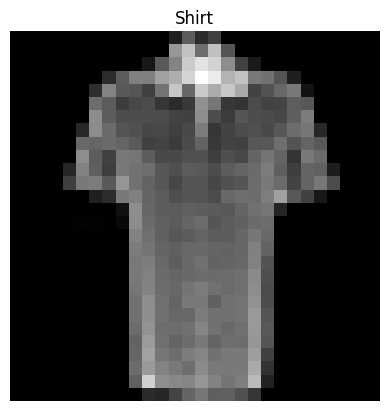

In [33]:
import matplotlib.pyplot as plt
import torch

# Ensure reproducibility
torch.manual_seed(42)

# Choose a random sample from the batch
random_index = torch.randint(len(train_features_batch), (1,)).item()
sample_image, sample_label = train_features_batch[random_index], train_labels_batch[random_index]

# Display the image
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(class_names[sample_label])
plt.axis('off')  # Turns off the axis lines and labels

# Print the size of the image and the label
print(f"Image size: {sample_image.shape}")
print(f"Label: {sample_label}, Label size: {sample_label.shape}")


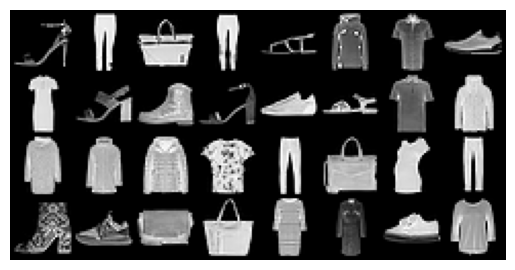

In [34]:
#Visualizing single batch images
def intensityscale(raw_img):

    # scale an image's intensity from [min, max] to [0, 1].
    v_min, v_max = raw_img.min(), raw_img.max()
    scaled_im = (raw_img * 1.0 - v_min) / (v_max - v_min)



    # clip to [0, 1]
    scaled_im = np.clip(scaled_im, 0, 1)

    return scaled_im

def imshow(img):
  img=intensityscale(img)
  npimg=img.numpy()
  plt.grid("off")
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.axis("off")
  plt.show()



imshow(torchvision.utils.make_grid(train_features_batch))

## 3.1 Model 1: Build a baseline model such MLP

In [42]:
class MLP_Net(nn.Module):
  """
  Construct a MLP Network
  """

  def __init__(self, input_feature_num, hidden_unit_nums, output_feature_num):
    """
    Initialize MLP Network parameters

    Args:
      input_feature_num: int
        Number of input features
      hidden_unit_nums: list
        Number of units per hidden layer, list of integers
      output_feature_num: int
        Number of output features

    Returns:
      Nothing
    """
    super(MLP_Net, self).__init__()
    self.input_feature_num = input_feature_num # Save the input size for reshaping later

    self.output_feature_num=output_feature_num
    self.mlp = nn.Sequential() # Initialize layers of MLP

    # Use for loop to create hidden layer and add them to the self.mlp
    for i in range(len(hidden_unit_nums)):
      if i==0:#To initialize input images and image shape as number of nodes
        layer=nn.Linear(input_feature_num,hidden_unit_nums[i])#This is first layer
      else:
        layer=nn.Linear(hidden_unit_nums[i-1],hidden_unit_nums[i])#Adds the number of hidden layers based on user input
      self.mlp.add_module(name="FC "+str(i),module=layer)# adding layer module into sequential object
      self.mlp.add_module(name='RELU '+str(i),module=nn.ReLU())# Adding an non linear activation layer
    self.mlp.add_module(name='output layer',module=nn.Linear(hidden_unit_nums[-1],output_feature_num))# Adding final layer

  def forward(self, x):
    """
    Perform the forward pass

    Args:
      x: tensor
        input images

    Returns:
      Nothing
    """

    x=torch.flatten(x,1)#Flat the image shape (batch_size,image shape)
    x=self.mlp(x)#Send the batch of images into fully connected layer
    return x

In [49]:
input_features=28*28#Image shape
hidden_layer_nodes=[40,30,20]# 3 hidden layers
output_features=10# Total number of classes

#Create a MLP FC class object and assign weights
model1=MLP_Net(input_features,hidden_layer_nodes,output_features)
#Lets look at the model structure
model1

MLP_Net(
  (mlp): Sequential(
    (FC 0): Linear(in_features=784, out_features=40, bias=True)
    (RELU 0): ReLU()
    (FC 1): Linear(in_features=40, out_features=30, bias=True)
    (RELU 1): ReLU()
    (FC 2): Linear(in_features=30, out_features=20, bias=True)
    (RELU 2): ReLU()
    (output layer): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [62]:
# Create Train and Test functions for code reproducibility
def Train_and_Test(train_loader,test_loader,model,criterion,optimizer,device,epochs,verbose=True):
  """
    Train MLP model with the training dataset and create optimal parameters

    Args:
      train_loader: DataLoader Object
        Consist of training example batches with labels
      test_loader:DataLoader Object
        Consist of testing example batches with labels
      Model: class object
        MLP model objects with 3 hidden layers
      criterion: Loss function
        Calculate loss with the given probability to the actual labels
      optimizer:Optimizer function
      Epochs:int
        Number of time to iterate through training samples.
      device:CPU or GPU

    Returns:
      Model parameters
      training_loss
    """

  """ Seting up training pipeline """
  training_loss=[]
  model.to(device)
  for epoch in range(epochs):
    print("Epochs : "+str(epoch))
    for i,data in enumerate(train_loader):
      # Get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device).float()
            labels = labels.to(device).long()

          # Zero the parameter gradients
            optimizer.zero_grad()

          # forward + backward + optimize
            outputs = model(inputs)

          #Calculate loss function
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

          # Print statistics
            if verbose:
                training_loss += [loss.item()]

  model.eval()

  def test(loader):
    testing_loss=[]
    model.to(device)
    predicted_labels=[]
    actual_labels=[]
    #total=0
    #correct=0
    for i,data in enumerate(loader):
      test_input,test_labels=data
      test_input=test_input.to(device).float()
      test_labels=test_labels.to(device).long()

      test_output=model(test_input)
      #calculate testing loss
      test_loss=criterion(test_output,test_labels)
      #adding loss values in to list for later visualisation
      if verbose:
        testing_loss.extend([test_loss.item()])
      #Finding the predicted labels
      x,predicted=torch.max(test_output,1)
      # adding batch sizes into a variable to downstream tasks
      #total+=test_labels.size(0)
      #Adding the number of correct predictions
      #correct+=(predicted==test_labels).sum().item()
      #Add all acutal labels for this batch
      actual_labels.extend(test_labels.cpu().numpy())
      #Add all predicted labels for this batch
      predicted_labels.extend(predicted.cpu().numpy())

    confusion=confusion_matrix(predicted_labels,actual_labels)
    test_classification=classification_report(predicted_labels,actual_labels)
    return testing_loss,confusion,test_classification
  testing_loss,test_confusion,test_classification=test(test_loader)

  return training_loss,testing_loss,test_confusion,test_classification


## Setting GPU

In [45]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cpu


In [63]:
#Let us initialise loss function and optimiser function
criterion = nn.CrossEntropyLoss() # define loss for multiclass classification
optimizer = optim.Adam(model1.parameters(), lr=2e-3) # define the optimizer

training_loss,testing_loss,test_confusion,test_classification=Train_and_Test(train_loader,test_loader,model1,criterion,optimizer,device,epochs=5,verbose=True)


Epochs : 0
Epochs : 1
Epochs : 2
Epochs : 3
Epochs : 4


In [113]:
#Create a function to visualize confussion matrix
def plot_confussion_matrix(cm):

  """
  Plot the confussion matrix
  arg:
    cm:confussion matric object

  return:
    nothing
  """
  ax=plt.subplot()
  ss.heatmap(cm,annot=True,ax=ax)
  ss.set(rc={'figure.figsize':(11.7,8.27)})
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(class_names)
  ax.yaxis.set_ticklabels(class_names)





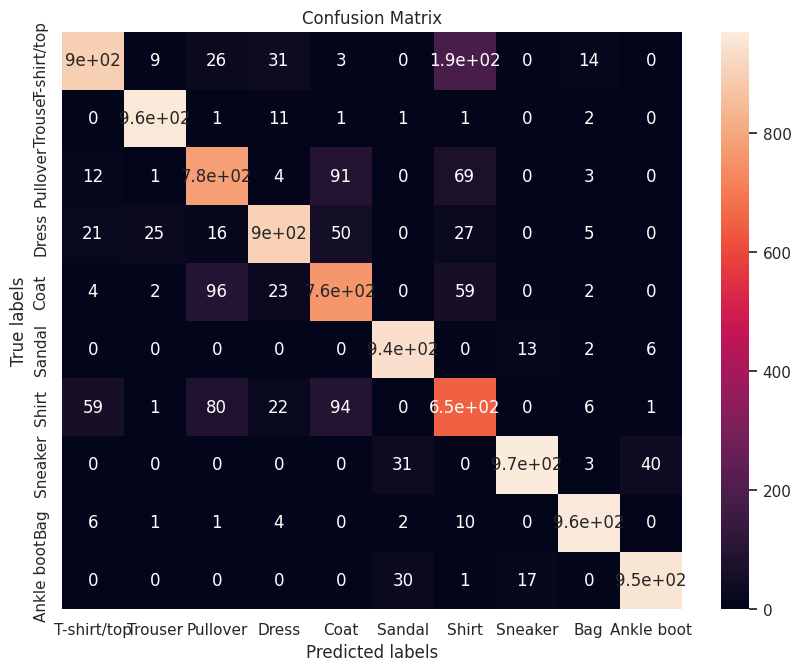

In [114]:
plot_confussion_matrix(test_confusion)

In [115]:
# Create a function to visualize the loss function.
def plot_loss(loss):
  """
  Plot the loss values for loss values
  """
  plt.plot(loss)
  plt.xlabel("Batches")
  plt.ylabel("loss")
  plt.show()



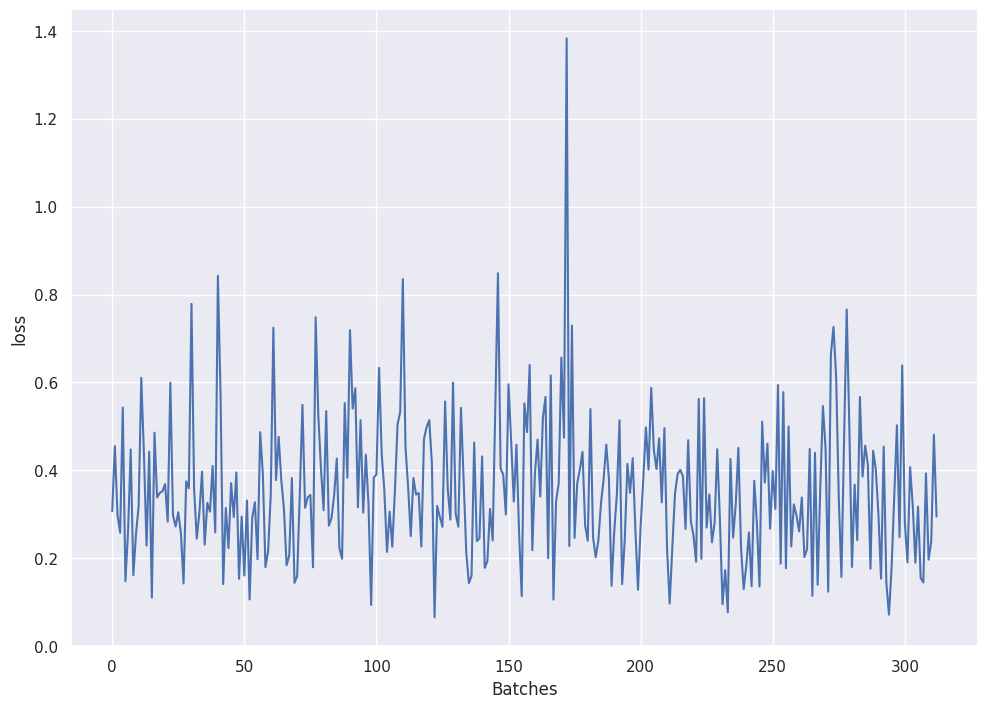

In [117]:
#Visualise the training loss
plot_loss(testing_loss)

## 3.1 Model 2: Build an advance Convolution neural network class to indentity features and edges in the image
